In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
sacog = pd.read_excel('../data/manipulatedData/sacog_recoded_012021.xlsx')

In [5]:
cat = ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']

Check no response and possible outlier.

NOTE: 11 corresponds to 'more than 10' orders or trips. At present, I just treat it as 11 trips (orders) / month

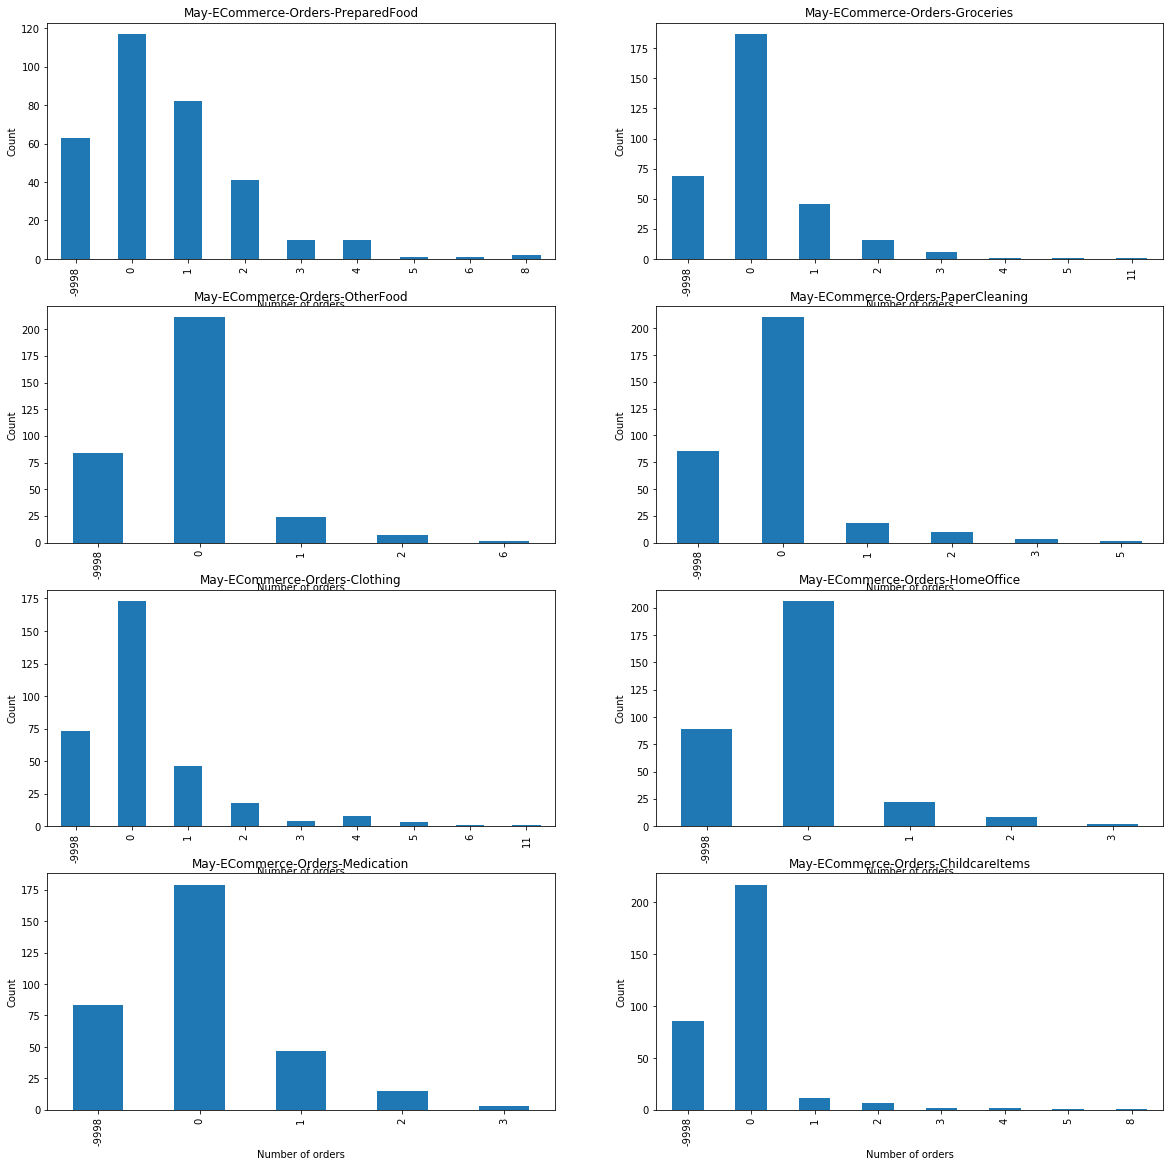

In [6]:
plt.figure(figsize=(20,20))
for i in range(len(cat)):
    plt.subplot(4, 2, i+1)
    sacog['May-ECommerce-Orders-'+cat[i]].value_counts().sort_index().T.plot(kind='bar')
    plt.title('May-ECommerce-Orders-'+cat[i])
    plt.xlabel('Number of orders')
    plt.ylabel('Count')

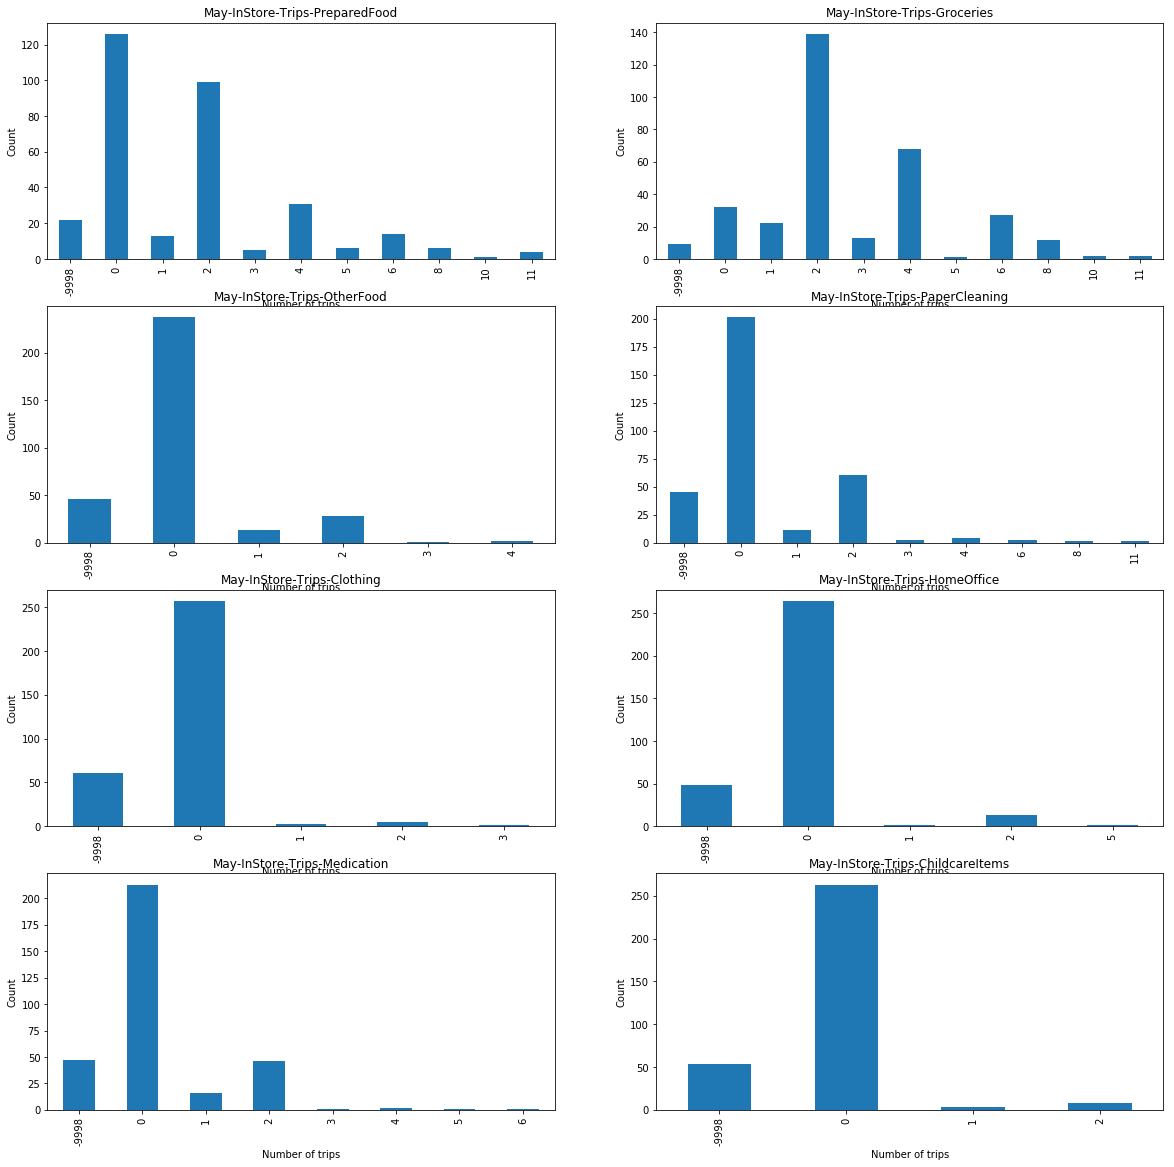

In [7]:
plt.figure(figsize=(20,20))
for i in range(len(cat)):
    plt.subplot(4, 2, i+1)
    sacog['May-InStore-Trips-'+cat[i]].value_counts().sort_index().T.plot(kind='bar')
    plt.title('May-InStore-Trips-'+cat[i])
    plt.xlabel('Number of trips')
    plt.ylabel('Count')

People who didn't answer orders purchased or trips made during the surveyed week also didn't answer the corresponding frequency question

In [10]:
for i in range(len(cat)):
    print(sacog[sacog['May-InStore-Trips-'+cat[i]] == -9998]['May-InStore-Frequency-'+cat[i]].unique())
    print(sacog[sacog['May-ECommerce-Orders-'+cat[i]] == -9998]['May-ECommerce-Frequency-'+cat[i]].unique())

['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']
['No Response']


In [18]:
sacog.loc[(sacog[['May-InStore-Trips-'+cat[i] for i in range(len(cat))]] == -9998).all(axis = 1)][['May-ECommerce-Orders-'+cat[i] for i in range(len(cat))]]

,May-ECommerce-Orders-PreparedFood,May-ECommerce-Orders-Groceries,May-ECommerce-Orders-OtherFood,May-ECommerce-Orders-PaperCleaning,May-ECommerce-Orders-Clothing,May-ECommerce-Orders-HomeOffice,May-ECommerce-Orders-Medication,May-ECommerce-Orders-ChildcareItems
56,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998
65,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998
133,1,-9998,-9998,-9998,-9998,-9998,-9998,-9998
310,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998
324,0,0,0,0,0,0,0,0


In [20]:
sacog.loc[(sacog[['May-InStore-Trips-'+cat[i] for i in range(len(cat))]] == -9998).all(axis = 1)][['PastYear-ECommerce-Frequency-'+cat[i] for i in range(len(cat))]]

,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-Groceries,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-ChildcareItems
56,Never,Never,Never,Never,Less than 1 time per month,Less than 1 time per month,Never,Less than 1 time per month
65,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response
133,Less than 1 time per week,No Response,No Response,No Response,Less than 1 time per month,Less than 1 time per month,No Response,No Response
310,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response
324,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response


In [41]:
#for i in range(len(cat)):
#    print(sacog[sacog['May-InStore-Frequency-'+cat[i]] == 'No Response']['May-InStore-Trips-'+cat[i]].value_counts())
#    print(sacog[sacog['May-ECommerce-Orders-'+cat[i]] == -9998]['May-ECommerce-Frequency-'+cat[i]].unique())

Those with -9998 /no response in their record have answered some other questions, guess they just didn't make any order during the survey week / don't use the service so were lazy to response. Just treat -9998 as 0 and no response as never

### Frequency encoding

In [78]:
freq_dict = {'More than 5 times per week': 7, 
             '3 - 5 times per week': 6,
             '2 - 3 times per week': 5,
             'About 1 time per week': 4,
             'Less than 1 time per week': 3,
             'Less than 1 time per month': 2,
             'Never': 1,
             'Almost never': 1,
             'No Response': 0}

In [79]:
def freq_online(orders):
    if orders > 5:
        return 7 #'More than 5 times per week'
    elif orders > 3:
        return 6 #'3 - 5 times per week'
    elif orders >= 2:
        return 5 #'2 - 3 times per week'
    elif orders >= 1:
        return 4 #'About 1 time per week'
    elif orders == 0:
        return 1 #'Never'

In [80]:
def freq_instore(trips):
    if trips/2 > 5:
        return 7 #'More than 5 times per week'
    elif trips/2 > 3:
        return 6 #'3 - 5 times per week'
    elif trips/2 >= 2:
        return 5 #'2 - 3 times per week'
    elif trips/2 >= 1:
        return 4 #'About 1 time per week'
    elif trips/2 < 1:
        return 3 #'Less than 1 time per week'
    elif trips == 0:
        return 1 #'Never'

In [81]:
for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
    sacog['May_Freq_E'+cat] = sacog['May-ECommerce-Frequency-'+cat].map(freq_dict)
    sacog['May_Freq_'+cat] = sacog['May-InStore-Frequency-'+cat].map(freq_dict)
    sacog['PastYear_Freq_E'+cat] = sacog['PastYear-ECommerce-Frequency-'+cat].map(freq_dict)
    sacog.loc[sacog['May-ECommerce-Orders-'+cat] > 0, 'May_Freq_E'+cat] = sacog.loc[sacog['May-ECommerce-Orders-'+cat] > 0]['May-ECommerce-Orders-'+cat].apply(freq_online)
    sacog.loc[sacog['May-InStore-Trips-'+cat] > 0, 'May_Freq_'+cat] = sacog.loc[sacog['May-InStore-Trips-'+cat] > 0]['May-InStore-Trips-'+cat].apply(freq_instore)
    # No response as never
    sacog['May_Freq_E'+cat].replace(0, 1, inplace=True)
    sacog['May_Freq_'+cat].replace(0, 1, inplace=True)
    sacog['PastYear_Freq_E'+cat].replace(0, 1, inplace=True)

In [ ]:
#for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
#    sacog['May_Freq_E'+cat] = sacog['May-ECommerce-Frequency-'+cat]
#    sacog['May_Freq_'+cat] = sacog['May-InStore-Frequency-'+cat].map(freq_dict)
#    sacog['PastYear_Freq_E'+cat] = sacog['PastYear-ECommerce-Frequency-'+cat].map(freq_dict)
#    sacog.loc[sacog['May-ECommerce-Orders-'+cat] > 0, 'May_Freq_E'+cat] = sacog.loc[sacog['May-ECommerce-Orders-'+cat] > 0]['May-ECommerce-Orders-'+cat].apply(freq_online)
#    sacog.loc[sacog['May-InStore-Trips-'+cat] > 0, 'May_Freq_'+cat] = sacog.loc[sacog['May-InStore-Trips-'+cat] > 0]['May-InStore-Trips-'+cat].apply(freq_instore)
#    # No response as never
#    sacog['May_Freq_E'+cat].replace(0, 1, inplace=True)
#    sacog['May_Freq_'+cat].replace(0, 1, inplace=True)
#    sacog['PastYear_Freq_E'+cat].replace(0, 1, inplace=True)

### purchase channel

In [82]:
def style_compare_consumption(row, cat):
    efreq = 'May_Freq_E' + cat
    freq = 'May_Freq_' + cat
    if ((row[efreq] == 1) & (row[freq] ==1)):
        return 'no shopping'
    elif (row[efreq] == 1) & (row[freq] > 1):
        return 'in-store only'
    elif (row[efreq] > 1) & (row[freq] > 1): # do both
        if row[freq] > row[efreq]:
            return 'more in-store'
        elif row[freq] == row[efreq]:
            return 'same freq'
        else:
            return 'more online'
    else:
        return 'online only'

In [83]:
for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
    sacog['style1-'+cat] = sacog.apply(lambda row: style_compare_consumption(row, cat), axis = 1)

### Monthly Frequency

In [84]:
for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
    sacog['May-InStore-Trips-'+cat].replace({-9998: 0}, inplace =True)
    sacog['May-ECommerce-Orders-'+cat].replace({-9998: 0},inplace =True)
    #sacog['May-InStore-Frequency-'+cat].replace({'No Response': 'Never'},inplace =True)
    #sacog['May-ECommerce-Frequency-'+cat].replace({'No Response': 'Never'},inplace =True)
    sacog['PastYear-ECommerce-Frequency-'+cat].replace({'No Response': 'Never'},inplace =True)

In [85]:
freq_dict = {'More than 5 times per week': 20, # 5*4
             '3 - 5 times per week': 16, # 4*4
             '2 - 3 times per week': 10, #2.5*4
             'About 1 time per week': 4, #1*4
             'Less than 1 time per week': 2, #Treat as twice a week
             'Less than 1 time per month': 1, # Treat as once per month
             'Never': 0,
             'Almost never': 0,
             'No Response': 0} # Treat no response as never

In [86]:
for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
    sacog['PastYear-Orders-'+cat] = sacog['PastYear-ECommerce-Frequency-'+cat].map(freq_dict)
    sacog['May-Orders-'+cat] = sacog['May-ECommerce-Orders-'+ cat] * 4
    sacog['May-Trips-'+cat] = sacog['May-InStore-Trips-'+cat] /2 * 4
    sacog.loc[sacog['May-ECommerce-Orders-'+cat] == 0, 'May-Orders-'+cat] = sacog.loc[sacog['May-ECommerce-Orders-'+cat] == 0]['May-ECommerce-Frequency-'+cat].map(freq_dict)
    sacog.loc[sacog['May-InStore-Trips-'+cat] == 0, 'May-Trips-'+cat] = sacog.loc[sacog['May-InStore-Trips-'+cat] == 0]['May-InStore-Frequency-'+cat].map(freq_dict)
    sacog['May-Total-'+ cat] = sacog['May-Orders-'+cat] + sacog['May-Trips-'+cat]
    sacog['May-Portion-E' + cat] = sacog['May-Orders-' + cat] / sacog['May-Total-'+cat]

In [87]:
for cat in ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing','HomeOffice','Medication','ChildcareItems']:
    sacog['PastYear-Tried-'+cat] = sacog['PastYear-Orders-'+cat].apply(lambda x: 0 if x == 0 else 1)

In [88]:
sacog.to_excel('../data/manipulatedData/sacog_with_new_variables.xlsx')

In [98]:

#sacog[['May-ECommerce-Orders-'+cat_ for cat_ in cat]].describe()
sacog[['May-InStore-Trips-'+cat_ for cat_ in cat]].describe()

,May-InStore-Trips-PreparedFood,May-InStore-Trips-Groceries,May-InStore-Trips-OtherFood,May-InStore-Trips-PaperCleaning,May-InStore-Trips-Clothing,May-InStore-Trips-HomeOffice,May-InStore-Trips-Medication,May-InStore-Trips-ChildcareItems
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,1.730887,2.801223,0.244648,0.562691,0.048930,0.097859,0.397554,0.058104
std,2.210070,2.090058,0.670199,1.221566,0.309448,0.479226,0.876269,0.322452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,11.000000,4.000000,11.000000,3.000000,5.000000,6.000000,2.000000



This household (no.48) have > 10 grocery online orders, >10 grocery instore trips, also >10 instore paper cleaning trips in a week. Could be junk data? Household size is 5, might be reasonable. In the past, they are also a frequent EUser 
for both essential and non-essential items.

In [103]:
sacog[sacog['May-ECommerce-Orders-Groceries'] == 11][['May-ECommerce-Orders-'+cat_ for cat_ in cat]]
#print('household size:', sacog.iloc[48]['NumberInHousehold'])

,May-ECommerce-Orders-PreparedFood,May-ECommerce-Orders-Groceries,May-ECommerce-Orders-OtherFood,May-ECommerce-Orders-PaperCleaning,May-ECommerce-Orders-Clothing,May-ECommerce-Orders-HomeOffice,May-ECommerce-Orders-Medication,May-ECommerce-Orders-ChildcareItems
48,2,11,0,5,6,1,3,8


In [104]:
sacog[sacog['May-ECommerce-Orders-Groceries'] == 11][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-Groceries,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-ChildcareItems
48,About 1 time per week,2 - 3 times per week,Almost never,About 1 time per week,Less than 1 time per month,Less than 1 time per month,Less than 1 time per month,Less than 1 time per week


This household (no.114, household size = 4) have > 10 online clothing orders during the survey week.
In 1/2019-1/2020, purchase clothes online more than 5 times per week. Could be a fashion family.. Purchase clothes, paper cleaning, childcare items online while food, grocery and medication instore during May. This family was also quite ECommerce penetrated in the past. Tried all sorts of products purchased online except for medication.

In [105]:
sacog[sacog['May-ECommerce-Orders-Clothing'] == 11][['May-ECommerce-Orders-'+cat_ for cat_ in cat]]

,May-ECommerce-Orders-PreparedFood,May-ECommerce-Orders-Groceries,May-ECommerce-Orders-OtherFood,May-ECommerce-Orders-PaperCleaning,May-ECommerce-Orders-Clothing,May-ECommerce-Orders-HomeOffice,May-ECommerce-Orders-Medication,May-ECommerce-Orders-ChildcareItems
114,1,0,0,1,11,0,0,2


In [106]:
sacog[sacog['May-ECommerce-Orders-Clothing'] == 11][['May-ECommerce-Frequency-'+cat_ for cat_ in cat]]

,May-ECommerce-Frequency-PreparedFood,May-ECommerce-Frequency-Groceries,May-ECommerce-Frequency-OtherFood,May-ECommerce-Frequency-PaperCleaning,May-ECommerce-Frequency-Clothing,May-ECommerce-Frequency-HomeOffice,May-ECommerce-Frequency-Medication,May-ECommerce-Frequency-ChildcareItems
114,No Response,No Response,No Response,No Response,No Response,Less than 1 time per week,No Response,No Response


In [107]:
sacog[sacog['May-ECommerce-Orders-Clothing'] == 11][['May-InStore-Trips-'+cat_ for cat_ in cat]]

,May-InStore-Trips-PreparedFood,May-InStore-Trips-Groceries,May-InStore-Trips-OtherFood,May-InStore-Trips-PaperCleaning,May-InStore-Trips-Clothing,May-InStore-Trips-HomeOffice,May-InStore-Trips-Medication,May-InStore-Trips-ChildcareItems
114,4,4,2,0,0,0,2,0


In [108]:
sacog[sacog['May-ECommerce-Orders-Clothing'] == 11][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-Groceries,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-ChildcareItems
114,Less than 1 time per week,Less than 1 time per week,Almost never,About 1 time per week,More than 5 times per week,Less than 1 time per week,Never,Less than 1 time per week


There are 4 households with >10 instore trips for prepared food during the surveyed week. These families
are really not a big fan of online shopping

In [109]:
sacog[sacog['May-InStore-Trips-PreparedFood'] == 11][['May-InStore-Trips-'+cat_ for cat_ in cat]]

,May-InStore-Trips-PreparedFood,May-InStore-Trips-Groceries,May-InStore-Trips-OtherFood,May-InStore-Trips-PaperCleaning,May-InStore-Trips-Clothing,May-InStore-Trips-HomeOffice,May-InStore-Trips-Medication,May-InStore-Trips-ChildcareItems
194,11,8,0,0,0,0,0,0
236,11,3,0,4,0,0,1,0
298,11,8,0,8,0,0,0,0
316,11,2,0,2,0,0,2,0


In [110]:
sacog[sacog['May-InStore-Trips-PreparedFood'] == 11][['May-ECommerce-Orders-'+cat_ for cat_ in cat]]

,May-ECommerce-Orders-PreparedFood,May-ECommerce-Orders-Groceries,May-ECommerce-Orders-OtherFood,May-ECommerce-Orders-PaperCleaning,May-ECommerce-Orders-Clothing,May-ECommerce-Orders-HomeOffice,May-ECommerce-Orders-Medication,May-ECommerce-Orders-ChildcareItems
194,0,0,0,0,2,0,0,2
236,0,0,0,0,0,0,1,0
298,2,3,0,0,0,0,0,0
316,2,0,0,0,0,0,0,0


In [112]:
sacog[sacog['May-InStore-Trips-PreparedFood'] == 11][['May-ECommerce-Frequency-'+cat_ for cat_ in cat]]

,May-ECommerce-Frequency-PreparedFood,May-ECommerce-Frequency-Groceries,May-ECommerce-Frequency-OtherFood,May-ECommerce-Frequency-PaperCleaning,May-ECommerce-Frequency-Clothing,May-ECommerce-Frequency-HomeOffice,May-ECommerce-Frequency-Medication,May-ECommerce-Frequency-ChildcareItems
194,Never,Almost never,Never,Almost never,No Response,Almost never,Never,No Response
236,Less than 1 time per month,Never,Never,Never,Never,Never,No Response,Never
298,No Response,No Response,Never,Never,Never,Less than 1 time per week,Never,Never
316,No Response,Almost never,Never,Never,Almost never,Never,Less than 1 time per month,Never


In [111]:
sacog[sacog['May-InStore-Trips-PreparedFood'] == 11][['PastYear-ECommerce-Frequency-'+cat_ for cat_ in cat]]

,PastYear-ECommerce-Frequency-PreparedFood,PastYear-ECommerce-Frequency-Groceries,PastYear-ECommerce-Frequency-OtherFood,PastYear-ECommerce-Frequency-PaperCleaning,PastYear-ECommerce-Frequency-Clothing,PastYear-ECommerce-Frequency-HomeOffice,PastYear-ECommerce-Frequency-Medication,PastYear-ECommerce-Frequency-ChildcareItems
194,Never,Almost never,Never,Less than 1 time per month,About 1 time per week,Less than 1 time per week,Almost never,Less than 1 time per month
236,Never,Never,Never,Never,Never,Never,Never,Never
298,Less than 1 time per week,Less than 1 time per week,Almost never,Less than 1 time per week,Less than 1 time per month,Less than 1 time per week,Almost never,Never
316,Less than 1 time per month,Never,Never,Never,Almost never,Never,Less than 1 time per month,Never
